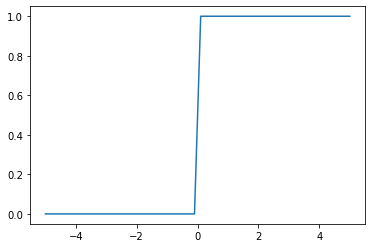

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):  #계단 함수
    return np.where(x<=0, 0, 1)

x = np.linspace(-5, 5)
y = step_function(x)

plt.plot(x, y)
plt.show()

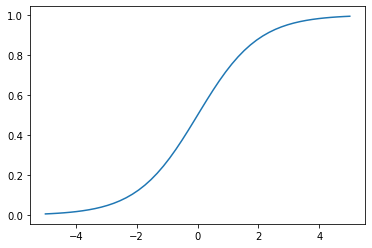

In [3]:
def sigmoid_function(x):
    return 1/(1+np.exp(-x))

x = np.linspace(5, -5)
y = sigmoid_function(x)

plt.plot(x, y)
plt.show()

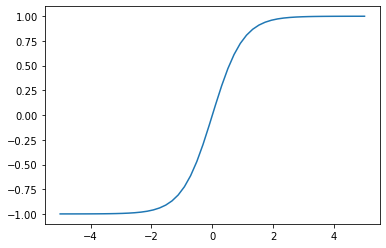

In [4]:
def tanh_function(x):
    return np.tanh(x)

x = np.linspace(-5, 5)
y = tanh_function(x)

plt.plot(x,y)
plt.show()

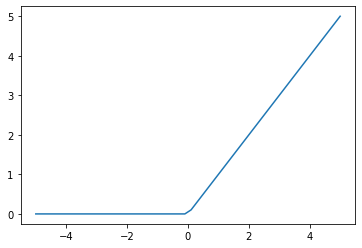

In [2]:
import numpy as np
import matplotlib.pylab as plt

def relu_function(x):
    return np.where(x <= 0, 0, x)

x = np.linspace(-5, 5)
y = relu_function(x)

plt.plot(x, y)
plt.show()

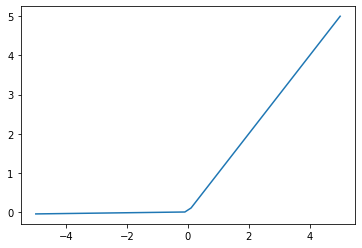

In [3]:
def leaky_relu_function(x):
    return np.where(x <= 0, 0.01*x, x)

x = np.linspace(-5, 5)
y = leaky_relu_function(x)

plt.plot(x, y)
plt.show()

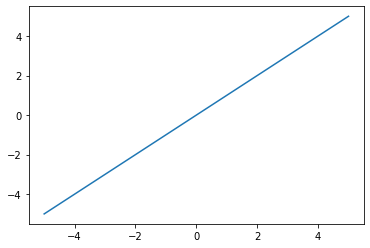

In [4]:
x = np.linspace(-5, 5)
y = x

plt.plot(x, y)
plt.show()

In [6]:
def softmax_function(x):
    return np.exp(x)/np.sum(np.exp(x))

y = softmax_function(np.array([1,2,3]))
print(y)

[0.09003057 0.24472847 0.66524096]


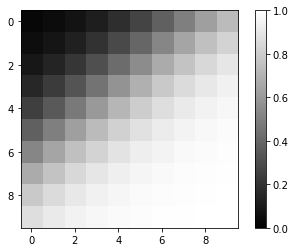

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-1.0, 1.0, 0.2) #원소 수는 10개
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10)) #출력값을 저장할 10x10 그리드

w_x = 2.5 #x,y값의 입력 가중치
w_y = 3.0

bias = 2.0 #편향

#그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
    for j in range(10):
        
        #입력과 가중치 곱의 합 + 편향
        u = X[i]*w_x + Y[j]*w_y + bias
        
        #그리드맵에 출력값 저장
        y = 1/(1+np.exp(-u)) #시그모이드 함수
        Z[j][i] = y
        
        
#그리드맵 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

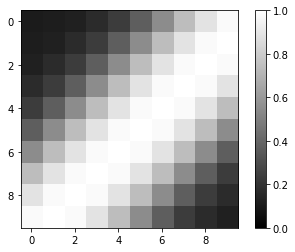

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-1.0, 1.0, 0.2) #원소는 10개
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

#가중치
w_im = np.array([[4.0,4.0], #은닉층 2x2 행렬
                [4.0,4.0]])
w_mo = np.array([[1.0],
                [-1.0]])  #출력층 2x10 행렬

#편향
b_im = np.array([3.0,-3.0])
b_mo = np.array([0.1])

#은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u)) #시그모이드 함수

#출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u    #항등함수

#그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):
        
        #순전파
        inp = np.array([X[i], Y[j]])  #입력층
        mid = middle_layer(inp, w_im, b_im)  #은닉층
        out = output_layer(mid, w_mo, b_mo)  #출력층
        
        #그리드맵에 신경망 출력값 저장
        Z[j][i] = out[0]
        
#그리드맵으로 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

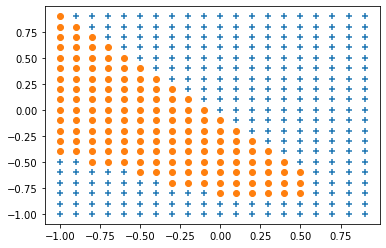

In [12]:
#x, y값
X = np.arange(-1.0, 1.0, 0.1) #원소의 수는 20개
Y = np.arange(-1.0, 1.0, 0.1)

#가중치
w_im = np.array([[1.0,2.0],
                [2.0,3.0]])  #은닉층 2x2행렬
w_mo = np.array([[-1.0,1.0],
                [1.0,-1.0]])  #출력층 2x2행렬

#편향
b_im = np.array([0.3,-0.3]) #은닉층
b_mo = np.array([0.4,0.1]) #출력층

#은닉층
def middle_layer(x,w,b):
    u = np.dot(x,w) + b
    return 1/(1+np.exp(-u)) #시그모이드 함수

#출력층
def output_layer(x,w,b):
    u = np.dot(x, w) + b
    return np.exp(u)/np.sum(np.exp(u)) #소프트맥스 함수

#분류 결과를 저장하는 리스트
x_1 = []
y_1 = []
x_2 = []
y_2 = []

#그리드맵의 각 그리드별 신경망 연산
for i in range(20):
    for j in range(20):
        
        #순전파
        inp = np.array([X[i],Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        #확률의 크기를 비교해 분류함
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
            
#산포도 표시
plt.scatter(x_1, y_1, marker="+")
plt.scatter(x_2, y_2, marker="o")
plt.show()


In [1]:
import numpy as np

def square_sum(y, t):  #출력값과 정답을 인수로 받음.
    return 1.0/2.0 * np.sum(np.square(y - t))

In [3]:
import numpy as np

def cross_entropy(y, t):  #출력값과 정답을 인수로 받음
    return - np.sum(t * np.log(y + 1e-7))

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


class OutputLayer:
    def __init__(self, n_upper, n):  #초기 설정
        self.w = wb_width * np.random.randn(n_upper, n)#가중치(행렬)
        self.b = wb_width * np.random.randn(n)#편향(벡터)
        
    def forward(self, x): #순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u #항등함수
    
    def backward(self, t): #역전파
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta): #가중치와 편향 수정
        self.w -= eta * self.grad_w #경사 하강법
        self.b -= eta * self.grad_b

In [4]:
class MiddleLayer:
    def __init__(self, n_upper, n): #초기 설정
        self.w = wb_width * np.random.randn(n_upper, n)#가중치(행렬)
        self.b = wb_width * np.random.randn(n)#편향(벡터)
        
    def forward(self, x): #순전파
        self.x = x
        u = u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) #시그모이드 함수
        
    def backward(self, grad_y): #역전파
        delta = grad_y * (1-self.y)*self.y #시그모이드 함수 미분
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta): #가중치와 편향 수정
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        

In [ ]:
middle_layer_1 = MiddleLayer(3,4) #은닉층 인스턴스 생성 예시
middle_layer_2 = MiddleLayer(4,5)

In [ ]:
#역전파 구현

#각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

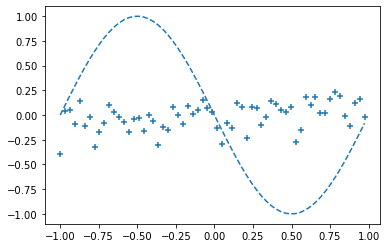

Epoch:0/2001 Error:0.2888431525267603


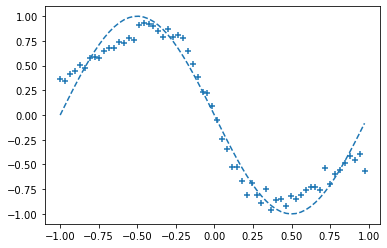

Epoch:200/2001 Error:0.011276493185904844


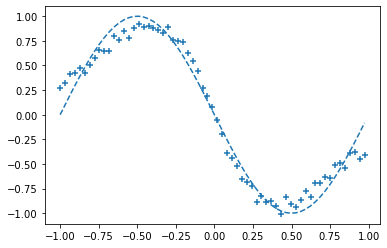

Epoch:400/2001 Error:0.007406070680571899


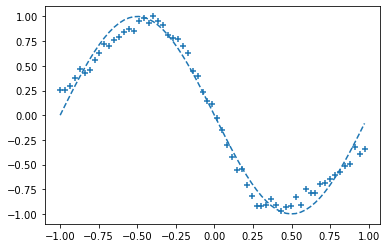

Epoch:600/2001 Error:0.0053288331169253


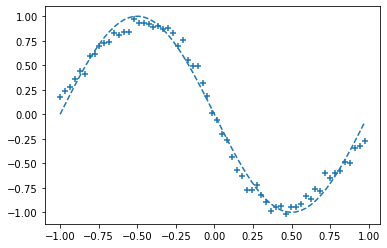

Epoch:800/2001 Error:0.0036977161731028556


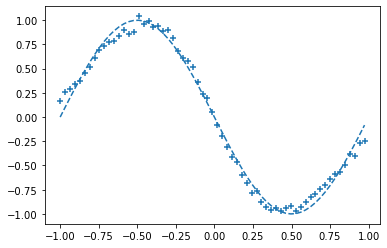

Epoch:1000/2001 Error:0.002447766908866216


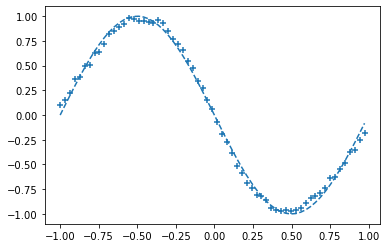

Epoch:1200/2001 Error:0.0010484642139332138


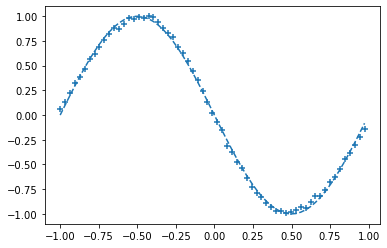

Epoch:1400/2001 Error:0.00041538348568331


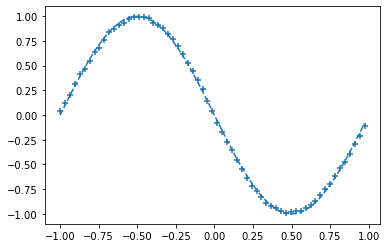

Epoch:1600/2001 Error:0.00015723796749240033


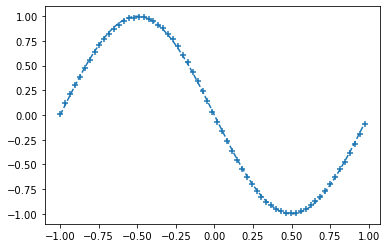

Epoch:1800/2001 Error:6.635421082984979e-05


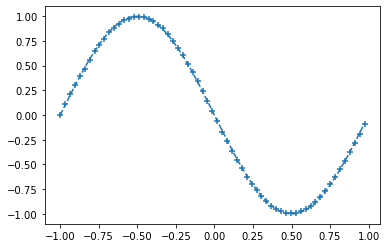

Epoch:2000/2001 Error:2.501739410615479e-05


In [8]:
#역전파 구현 전체 코드(회귀)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


#입력과 정답 준비
input_data = np.arange(0, np.pi*2, 0.1) #입력
correct_data = np.sin(input_data) #정답
input_data = (input_data-np.pi)/np.pi #입력을 -1.0~1.0 범위 안으로
n_data = len(correct_data) #데이터 수

#각 설정 값
n_in = 1 #입력층의 뉴런 수
n_mid = 3 #은닉층의 뉴런 수
n_out = 1 #출력층의 뉴런 수

wb_width = 0.01 #가중치와 편향 설정을 위한 정규분포의 표준편차
eta = 0.1 #학습률
epoch = 2001
interval = 200 #경과 표시 간격

#은닉층
class MiddleLayer:
    def __init__(self, n_upper, n): #초기 설정
        self.w = wb_width * np.random.randn(n_upper, n)#가중치(행렬)
        self.b = wb_width * np.random.randn(n)#편향(벡터)
        
    def forward(self, x): #순전파
        self.x = x
        u = u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) #시그모이드 함수
        
    def backward(self, grad_y): #역전파
        delta = grad_y * (1-self.y)*self.y #시그모이드 함수 미분
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta): #가중치와 편향 수정
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
#출력층
class OutputLayer:
    def __init__(self, n_upper, n):  #초기 설정
        self.w = wb_width * np.random.randn(n_upper, n)#가중치(행렬)
        self.b = wb_width * np.random.randn(n)#편향(벡터)
        
    def forward(self, x): #순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u #항등함수
    
    def backward(self, t): #역전파
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta): #가중치와 편향 수정
        self.w -= eta * self.grad_w #경사 하강법
        self.b -= eta * self.grad_b

#각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

#학습
for i in range(epoch):
    
    #인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    #결과 표시
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1] #입력
        t = correct_data[idx:idx+1] #정답
        
        #순전파
        middle_layer.forward(x.reshape(1,1)) #입력을 행렬로 변환
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1,1)) #정답을 행렬로 변환
        middle_layer.backward(output_layer.grad_x)
        
        #가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            y = output_layer.y.reshape(-1) #행렬을 벡터로 되돌림
            
            #오차제곱합 계산
            total_error += 1.0/2.0*np.sum(np.square(y-t))
            
            #출력 기록
            plot_x.append(x)
            plot_y.append(y)
  

    if i%interval == 0:

        #출력 그래프 표시
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()

        #에포크 수와 오차 표시
        print("Epoch:" + str(i) + "/" + str(epoch),
              "Error:" + str(total_error/n_data))
        
        

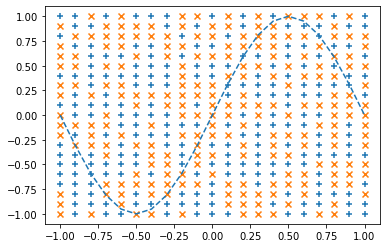

Epoch:0/101 Error:0.7284396739672273


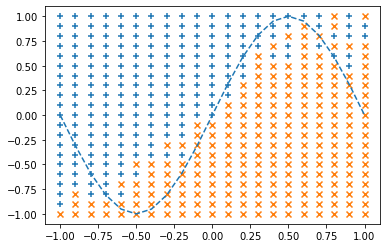

Epoch:10/101 Error:0.312954226833336


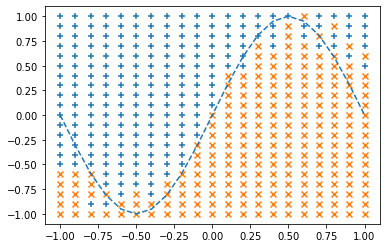

Epoch:20/101 Error:0.2293768305892934


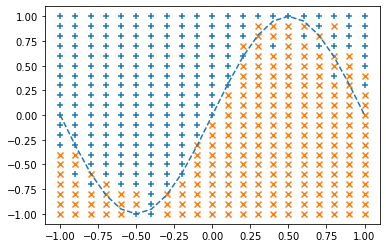

Epoch:30/101 Error:0.1741065683180871


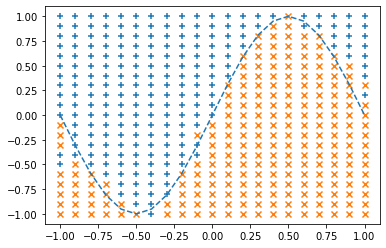

Epoch:40/101 Error:0.12749539114329286


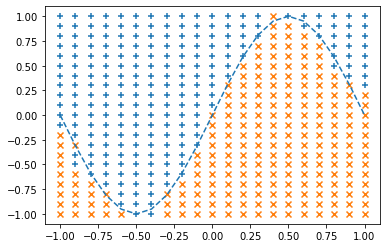

Epoch:50/101 Error:0.0999158398777463


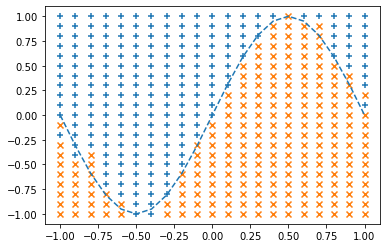

Epoch:60/101 Error:0.08147195077254221


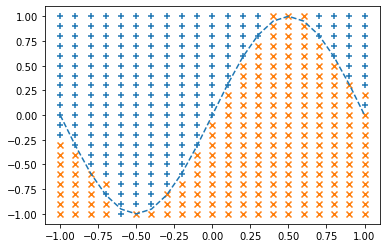

Epoch:70/101 Error:0.07832314707754902


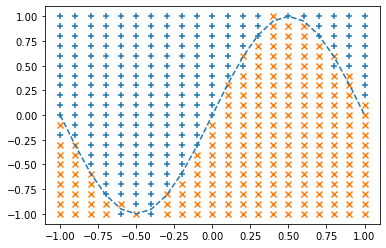

Epoch:80/101 Error:0.07490660733482188


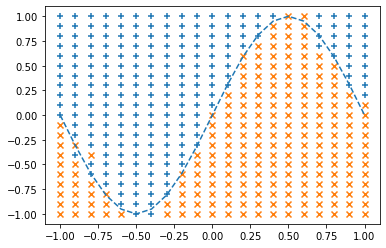

Epoch:90/101 Error:0.07305692542322631


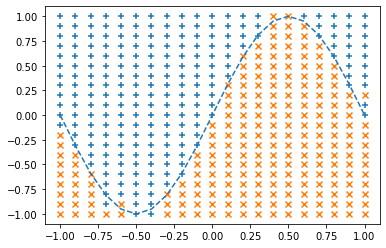

Epoch:100/101 Error:0.0693921264083061


In [18]:
#역전파 구현 전체 코드(분류)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#값
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

#입력, 정답 벡터 생성
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x,y])
        if y < np.sin(np.pi * x): #y값이 sin곡선 아래에 있으면
            correct_data.append([0,1]) #아래 영역
        else:
            correct_data.append([1,0]) #위 영역

n_data = len(correct_data) #데이터 수

input_data = np.array(input_data)
correct_data = np.array(correct_data)

#각 설정 값
n_in = 2 #입력층 뉴런 수
n_mid = 6 #은닉층 뉴런 수
n_out = 2 #출력층 뉴런 수
wb_width = 0.01 #가중치와 편향 설정을 위한 정규분포 표준편차
eta = 0.1 #학습률
epoch = 101
interval = 10 #경과 표시 간격

#은닉층
class MiddleLayer:
    def __init__(self, n_upper, n): #초기 설정
        self.w = wb_width * np.random.randn(n_upper, n)#가중치(행렬)
        self.b = wb_width * np.random.randn(n)#편향(벡터)
        
    def forward(self, x): #순전파
        self.x = x
        u = u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) #시그모이드 함수
        
    def backward(self, grad_y): #역전파
        delta = grad_y * (1-self.y)*self.y #시그모이드 함수 미분
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta): #가중치와 편향 수정
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
#출력층
class OutputLayer:
    def __init__(self, n_upper, n):  #초기 설정
        self.w = wb_width * np.random.randn(n_upper, n)#가중치(행렬)
        self.b = wb_width * np.random.randn(n)#편향(벡터)
        
    def forward(self, x): #순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True) #소프트맥스 함수
    
    def backward(self, t): #역전파
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta): #가중치와 편향 수정
        self.w -= eta * self.grad_w #경사 하강법
        self.b -= eta * self.grad_b
        

#각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

#학습
sin_data = np.sin(np.pi * X) #결과 검증용
for i in range(epoch):
    #인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    #결과 표시용
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
    
        #순전파
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)

        #역전파
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)

        #가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)

        if i%interval == 0:
            y = output_layer.y.reshape(-1) #행렬을 벡터로 되돌림
            #교차 엔트로피 오차
            total_error += - np.sum(t * np.log(y + 1e-7))

            #확률 크기를 비교하여 분류
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])

    if i%interval == 0:

        #출력 그래프 표시
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()

        #에포크 수와 오차 표시
        print("Epoch:" + str(i) + "/" + str(epoch),
                "Error:" + str(total_error/n_data))